In [1]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [107]:
import sys
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
import string

# to view all columns
pd.set_option("display.max.columns", None)

In [108]:
#Import the necessary methods from tweepy library  

#install tweepy if you don't have it
#!pip install tweepy
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#sentiment analysis package
#!pip install textblob
from textblob import TextBlob

#general text pre-processor
#!pip install nltk
import nltk
from nltk.corpus import stopwords
# nltk.download('punkt')

#tweet pre-processor 
#!pip install tweet-preprocessor
import preprocessor as p

In [2]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                             
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('finding',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

In [3]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa',tag='h2')
res

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

In [32]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = simple_get(url)

In [33]:
result = get_elements(response, search={'find_all':{'class_':'wp-block-embed__wrapper'}})
result

findaing all of {'class_': 'wp-block-embed__wrapper'}


['\nhttps://twitter.com/TsholetsaDomi/status/1238324860536922112\n',
 '\nhttps://twitter.com/Azali_officiel/status/1239649350747332613\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">The Deputy Prime Minister Themba Masuku has today met representatives of the private sector and employees' unions to map a collaborative effort in the fight against <a href="https://twitter.com/hashtag/COVID19?src=hash&amp;ref_src=twsrc%5Etfw">#COVID19</a>. <a href="https://t.co/EIYNGOEKRN">pic.twitter.com/EIYNGOEKRN</a></p>— Eswatini Government (@EswatiniGovern1) <a href="https://twitter.com/EswatiniGovern1/status/1241038139889721346?ref_src=twsrc%5Etfw">March 20, 2020</a></blockquote>,
 <script async="" charset="utf-8" src="https://platform.twitter.com/widgets.js"></script>,
 '\n',
 '\nhttps://twitter.com/SE_Rajoelina/status/1241101811647500288\n',
 '\n',
 <blockquote class="twitter-tweet" data-dnt="true" data-width="550"><p dir="ltr" lang="en">GUIDEL

In [103]:
import re
pattern = r'@[a-zA-Z]+'
leaders_name = re.findall(pattern, str(result))

In [104]:
pattern = r'@[\da-zA-Z]+'

inf_names = re.findall(pattern, str(res))
len(inf_names)

100

In [177]:
class tweetsearch():
    '''
    This is a basic class to search and download twitter data.
    You can build up on it to extend the functionalities for more 
    sophisticated analysis
    '''
    def __init__(self, cols=None,auth=None):
        #
        if not cols is None:
            self.cols = cols
        else:
            self.cols = ['id', 'created_at', 'source', 'original_text','clean_text', 
                        'sentiment','polarity','subjectivity', 'lang', 'favorite_count',
                         'retweet_count', 'possibly_sensitive', 'hashtags', 'original_author',
                          'user_mentions','followers_count','friends_count', 'place', 
                         'place_coord_boundaries']
            
        if auth is None:
            
            #Variables that contains the user credentials to access Twitter API 
            consumer_key = os.environ('CONSUMER_KEY')
            consumer_secret =  os.environ('CONSUMER_SECRET')
            access_token =  os.environ('ACCESS_TOKEN')
            access_token_secret =  os.environ('ACCESS_TOKEN_SECRET')
            


            #This handles Twitter authetification and the connection to Twitter Streaming API
            auth = OAuthHandler(consumer_key, consumer_secret)
            auth.set_access_token(access_token, access_token_secret)
            

        #            
        self.auth = auth
        self.api = tweepy.API(auth) 
        self.filtered_tweet = ''
            

    def clean_tweets(self, twitter_text):

        #use pre processor
        tweet = p.clean(twitter_text)

         #HappyEmoticons
        emoticons_happy = set([
            ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
            ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
            '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
            'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
            '<3'
            ])

        # Sad Emoticons
        emoticons_sad = set([
            ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
            ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
            ':c', ':{', '>:\\', ';('
            ])

        #Emoji patterns
        emoji_pattern = re.compile("["
                 u"\U0001F600-\U0001F64F"  # emoticons
                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                 u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                 u"\U00002702-\U000027B0"
                 u"\U000024C2-\U0001F251"
                 "]+", flags=re.UNICODE)

        #combine sad and happy emoticons
        emoticons = emoticons_happy.union(emoticons_sad)

        stop_words = set(stopwords.words('english'))
        word_tokens = nltk.word_tokenize(tweet)
        #after tweepy preprocessing the colon symbol left remain after      
        #removing mentions
        tweet = re.sub(r':', '', tweet)
        tweet = re.sub(r'‚Ä¶', '', tweet)

        #replace consecutive non-ASCII characters with a space
        tweet = re.sub(r'[^\x00-\x7F]+',' ', tweet)

        #remove emojis from tweet
        tweet = emoji_pattern.sub(r'', tweet)

        #filter using NLTK library append it to a string
        filtered_tweet = [w for w in word_tokens if not w in stop_words]

        #looping through conditions
        filtered_tweet = []    
        for w in word_tokens:
        #check tokens against stop words , emoticons and punctuations
            if w not in stop_words and w not in emoticons and w not in string.punctuation:
                filtered_tweet.append(w)

        return ' '.join(filtered_tweet)            

    def get_tweets(self, username, csvfile=None):
        '''
        'count' specifies the number of tweets to try and retrieve, up to a maximum of 200 per distinct request. 
        The value of count is best thought of as a limit to the number of tweets to return because suspended or 
        deleted content is removed after the count has been applied. We include retweets in the count, 
        even if include_rts is not supplied. It is recommended you always send include_rts=1 when using this API method.
         
        THE SCRIPT IS CURRENT SET UP TO DOWNLOAD ALL AVAILABLE PAGES -- 16 PAGES OF 200 TWEETS = 3,200 TWEETS/ACCOUNT TOTAL
        ''' 
        df = pd.DataFrame(columns=self.cols)
        
        if not csvfile is None:
            #If the file exists, then read the existing data from the CSV file.
            if os.path.exists(csvfile):
                df = pd.read_csv(csvfile, header=0)
            
        try:
            #page attribute in tweepy.cursor and iteration
            for page in tweepy.Cursor(self.api.user_timeline, screen_name=username, 
                                      count=100, include_rts=True).pages():

                # the you receive from the Twitter API is in a JSON format and has quite an amount of information attached
                for status in page:

                    new_entry = []
                    status = status._json

                    #filter by language
                    if status['lang'] != 'en':
                        continue


                    #if this tweet is a retweet update retweet count
                    if status['created_at'] in df['created_at'].values:
                        i = df.loc[df['created_at'] == status['created_at']].index[0]
                        #
                        cond1 = status['favorite_count'] != df.at[i, 'favorite_count']
                        cond2 = status['retweet_count'] != df.at[i, 'retweet_count']
                        if cond1 or cond2:
                            df.at[i, 'favorite_count'] = status['favorite_count']
                            df.at[i, 'retweet_count'] = status['retweet_count']
                        continue

                    #calculate sentiment
                    filtered_tweet = self.clean_tweets(status['text'])
                    blob = TextBlob(filtered_tweet)
                    Sentiment = blob.sentiment     
                    polarity = Sentiment.polarity
                    subjectivity = Sentiment.subjectivity

                    new_entry += [status['id'], status['created_at'],
                                  status['source'], status['text'], filtered_tweet, 
                                  Sentiment,polarity,subjectivity, status['lang'],
                                  status['favorite_count'],
                                  status['retweet_count']]

                    new_entry.append(status['user']['screen_name'])

                    try:
                        is_sensitive = status['possibly_sensitive']
                    except KeyError:
                        is_sensitive = None

                    new_entry.append(is_sensitive)

                    hashtags = ", ".join([hashtag_item['text'] for hashtag_item in status['entities']['hashtags']])
                    new_entry.append(hashtags) #append the hashtags

                    #
                    mentions = ", ".join([mention['screen_name'] for mention in status['entities']['user_mentions']])
                    new_entry.append(mentions) #append the user mentions

                    followers_count = status['user']['followers_count']
                    new_entry.append(followers_count) #append the followers counts

                    friend_count = status['user']['friends_count']
                    new_entry.append(friend_count) #append the friend counts

                    try:
                        xyz = status['place']['bounding_box']['coordinates']
                        coordinates = [coord for loc in xyz for coord in loc]
                    except TypeError:
                        coordinates = None
                    #
                    new_entry.append(coordinates)

                    try:
                        location = status['user']['location']
                    except TypeError:
                        location = ''
                    #
                    new_entry.append(location)

                    #now append a row to the dataframe
                    single_tweet_df = pd.DataFrame([new_entry], columns=self.cols)
                    df = df.append(single_tweet_df, ignore_index=True)
        
        except:
            print('user not found')
        if not csvfile is None:
            #save it to file
            df.to_csv(csvfile, columns=self.cols, index=False, encoding="utf-8")
            
        return df

In [179]:
# try:
#     a = api.get_user(leaders_name[0])
# except:
#     print('error')
# type(a)

error


tweepy.models.User

In [149]:
tweets_file = 'influential_tweets.csv'
ts = tweetsearch()
for popul_name in inf_names[:50]:
    df = ts.get_tweets(popul_name, tweets_file)
    print(f'Finished Downloading and Saving Tweets from {popul_name}')

Finished Downloading and Saving Tweets from @gettleman
Finished Downloading and Saving Tweets from @a24media
Finished Downloading and Saving Tweets from @andiMakinana
Finished Downloading and Saving Tweets from @AfricaCheck
Finished Downloading and Saving Tweets from @JamesCopnall
Finished Downloading and Saving Tweets from @oafrica
Finished Downloading and Saving Tweets from @PatrickNgowi
Finished Downloading and Saving Tweets from @StateAfrica
Finished Downloading and Saving Tweets from @Moadow
Finished Downloading and Saving Tweets from @BrendanSAfrica
Finished Downloading and Saving Tweets from @CityTshwane
Finished Downloading and Saving Tweets from @VISI


TweepError: Twitter error response: status code = 404

In [150]:
df.shape

(27833, 19)

In [151]:
df.head()

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,original_author,user_mentions,followers_count,friends_count,place,place_coord_boundaries
0,1282894705026453504,Tue Jul 14 04:28:27 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @SavvyPriya: @gettleman @HariNYT It's a ver...,It 's charming article India 's response coron...,"Sentiment(polarity=0.7, subjectivity=1.0)",0.700000,1.000000,en,0,1,gettleman,NaN,NaN,"SavvyPriya, gettleman, HariNYT",25706,37,NaN,"New Delhi, India"
1,1282642830599450626,Mon Jul 13 11:47:35 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @KetanDayal: How world's 2 biggest troops o...,How world 's biggest troops operates ft. A gro...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,1,gettleman,NaN,NaN,KetanDayal,25706,37,NaN,"New Delhi, India"
2,1282499886189932545,Mon Jul 13 02:19:35 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",The illustrious Bollywood Bachchan clan tests ...,The illustrious Bollywood Bachchan clan tests ...,"Sentiment(polarity=0.22727272727272727, subjec...",0.227273,0.545455,en,26,7,gettleman,False,NaN,NaN,25706,37,NaN,"New Delhi, India"
3,1282377955419713537,Sun Jul 12 18:15:04 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",Dan Eldon was killed on this date in 1992. He ...,Dan Eldon killed date He squeezed hell every d...,"Sentiment(polarity=0.06666666666666665, subjec...",0.066667,0.416667,en,19,3,gettleman,False,NaN,NaN,25706,37,NaN,"New Delhi, India"
4,1282376120243908608,Sun Jul 12 18:07:47 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...","RT @Chun_Gurung: “He’s like god,” said Shivend...",Hes like god said Shivendra Singh Dungarpur fi...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.000000,0.000000,en,0,1,gettleman,NaN,NaN,"Chun_Gurung, SrBachchan",25706,37,NaN,"New Delhi, India"


In [131]:
df['followers_count'].unique()

array([ 25706,  31291, 101167], dtype=int64)

In [135]:
df[(df['possibly_sensitive'] == 'gettleman') & (df['followers_count'] == 25706)].head(2)

,id,created_at,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,original_author,user_mentions,followers_count,friends_count,place,place_coord_boundaries
0,1282894705026453504,Tue Jul 14 04:28:27 +0000 2020,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @SavvyPriya: @gettleman @HariNYT It's a ver...,It 's charming article India 's response coron...,"Sentiment(polarity=0.7, subjectivity=1.0)",0.7,1.0,en,0,1,gettleman,NaN,NaN,"SavvyPriya, gettleman, HariNYT",25706,37,NaN,"New Delhi, India"
1,1282642830599450626,Mon Jul 13 11:47:35 +0000 2020,"<a href=""http://twitter.com/download/iphone"" r...",RT @KetanDayal: How world's 2 biggest troops o...,How world 's biggest troops operates ft. A gro...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0,en,0,1,gettleman,NaN,NaN,KetanDayal,25706,37,NaN,"New Delhi, India"


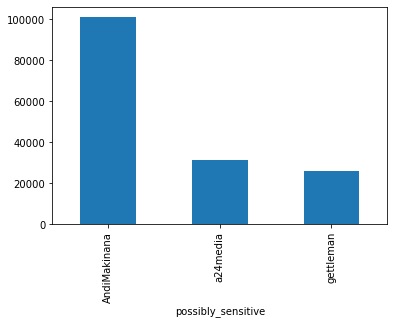

In [137]:
df.groupby('possibly_sensitive')['followers_count'].max().plot(kind='bar')

In [153]:
df['popularity_score'] = df['retweet_count'] + df['favorite_count']
df['reach_score'] = df['followers_count'] - df['friends_count']

${\textbf{The 10 Most Influential Twitter Users in Africa}}$

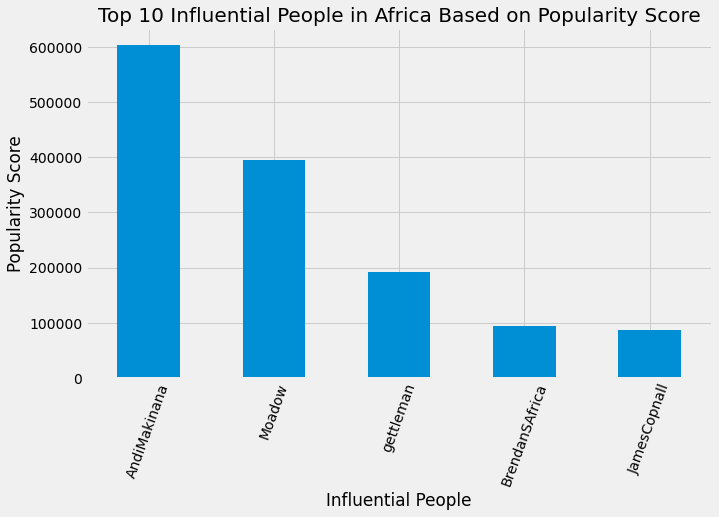

In [163]:
plt.style.use('fivethirtyeight')
df.groupby('possibly_sensitive')['popularity_score'].max().sort_values(ascending=False)[:5]\
                                    .plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Influential People in Africa Based on Popularity Score', size=20)
plt.ylabel('Popularity Score')
plt.xlabel('Influential People')
plt.xticks(rotation=70)
plt.show()

In [164]:
df.groupby('possibly_sensitive')['popularity_score'].max().sort_values(ascending=False)[:5]

possibly_sensitive
AndiMakinana      604781
Moadow            396123
gettleman         191711
BrendanSAfrica     93947
JamesCopnall       86462
Name: popularity_score, dtype: int64

### African Leaders

In [181]:
tweets_file = 'africa_leaders_tweets.csv'
ts = tweetsearch()
for leader_name in leaders_name[:20]:
    leader_df = ts.get_tweets(leader_name, tweets_file)
    print(f'Finished Downloading and Saving Tweets from {leader_name}')

user not found
Finished Downloading and Saving Tweets from @EswatiniGovern
Finished Downloading and Saving Tweets from @MalawiGovt
Finished Downloading and Saving Tweets from @hagegeingob
Finished Downloading and Saving Tweets from @FinanceSC
Finished Downloading and Saving Tweets from @PresidencyZA
user not found
Finished Downloading and Saving Tweets from @Dora
user not found
Finished Downloading and Saving Tweets from @ChitaluChilufy
Finished Downloading and Saving Tweets from @noalaskinner
Finished Downloading and Saving Tweets from @coumbagadio
Finished Downloading and Saving Tweets from @unicefzambia
Finished Downloading and Saving Tweets from @UNZambia
Finished Downloading and Saving Tweets from @mohzambia
Finished Downloading and Saving Tweets from @edmnangagwa
Finished Downloading and Saving Tweets from @MinSantedj
Finished Downloading and Saving Tweets from @hawelti
Finished Downloading and Saving Tweets from @StateHouseKenya
Finished Downloading and Saving Tweets from @WHO
u

In [182]:
leader_df['popularity_score'] = leader_df['retweet_count'] + leader_df['favorite_count']
leader_df['reach_score'] = leader_df['followers_count'] - leader_df['friends_count']

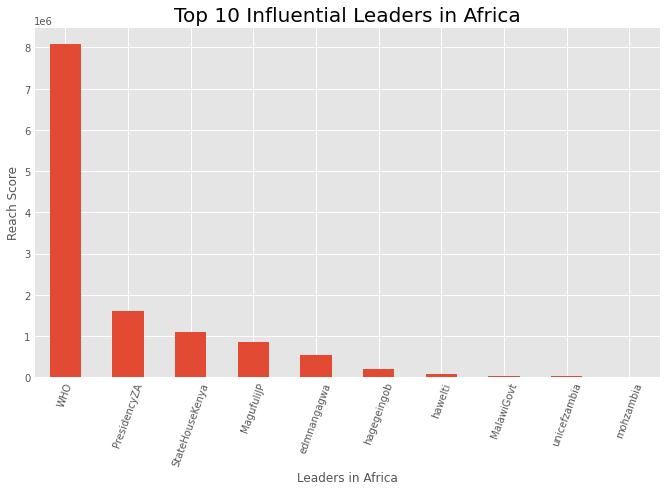

In [188]:
plt.style.use('ggplot')
leader_df.groupby('possibly_sensitive')['reach_score'].max().sort_values(ascending=False)[:10]\
                                    .plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Influential Leaders in Africa', size=20)
plt.ylabel('Reach Score')
plt.xlabel('Leaders in Africa')
plt.xticks(rotation=70)
plt.show()

In [187]:
leader_df.groupby('possibly_sensitive')['reach_score'].max().sort_values(ascending=False)[:10]

possibly_sensitive
WHO                8085584
PresidencyZA       1595373
StateHouseKenya    1100488
MagufuliJP          864792
edmnangagwa         544256
hagegeingob         191678
hawelti              65449
MalawiGovt           38989
unicefzambia         27804
mohzambia             6997
Name: reach_score, dtype: int64

In [195]:
# tweet handles of african leaders
first_10_leaders_name = leaders_name[-10:]
len(first_10_leaders_name)

10

In [201]:
pd.Series(first_10_leaders_name, name='Twitter_Handles').to_csv('10_leaders_name_handles.csv', index=False)

In [202]:
# tweet handles of influential people
ten_names_infl = inf_names[-10:] 
pd.Series(ten_names_infl, name='Twitter_Handles').to_csv('10_influential_names_twitter_handles.csv', index=False)